In [62]:
pip install -U ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [64]:
%matplotlib inline

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from ydata_profiling import ProfileReport

# Carregar os dados
data = pd.read_csv('spam-datasset.csv')

In [66]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [68]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [82]:
profile = ProfileReport(data, title="Spam Data Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [70]:
profile.to_file("spam_data_profiling_report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

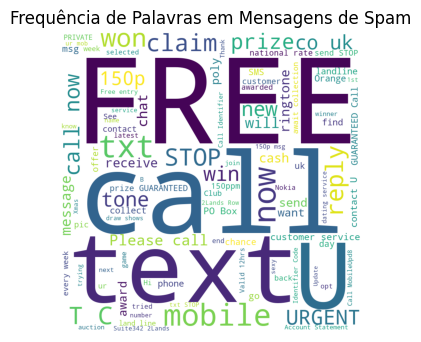

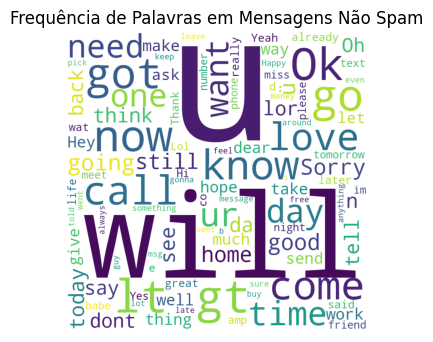

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def visualize_word_frequencies(messages, title):
    text = ' '.join(messages)
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, max_words=100).generate(text)
    
    plt.figure(figsize=(3, 3), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.show()

spam_messages = data[data['Category'] == 'spam']['Message']
ham_messages = data[data['Category'] == 'ham']['Message']

visualize_word_frequencies(spam_messages, 'Frequência de Palavras em Mensagens de Spam')
visualize_word_frequencies(ham_messages, 'Frequência de Palavras em Mensagens Não Spam')


In [72]:
# Criar a matriz de atributos (X) e o vetor de rótulos (y)
#X = data['Message']  # Substitua 'message' pelo nome da coluna com o texto das mensagens em seu conjunto de dados
#y = data['Category']    # Substitua 'label' pelo nome da coluna com os rótulos (spam/ham) em seu conjunto de dados

# Dividir os dados em conjuntos de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vetorizar o texto usando o CountVectorizer
#vectorizer = CountVectorizer()
#X_train_vectorized = vectorizer.fit_transform(X_train)
#X_test_vectorized = vectorizer.transform(X_test)

# Treinar o modelo de classificação
#classifier = MultinomialNB()
#classifier.fit(X_train_vectorized, y_train)

# Prever as classes para o conjunto de teste
#y_pred = classifier.predict(X_test_vectorized)

Análise exploratória e pré-processamento de dados:

In [73]:
# Visualizar as primeiras linhas dos dados
print(data.head())

# Verificar se há valores ausentes
print(data.isnull().sum())

# Remover caracteres não desejados e converter o texto em minúsculas
import re
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

data['Message'] = data['Message'].apply(preprocess_text)


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Category    0
Message     0
dtype: int64


Engenharia de atributos:

In [74]:
# Tokenização e remoção de stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')



stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

data['Message'] = data['Message'].apply(tokenize_and_remove_stopwords)

# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

data['Message'] = data['Message'].apply(stem_words)

# Reconstruindo a mensagem após a limpeza
def rebuild_message(words):
    return ' '.join(words)

data['Message'] = data['Message'].apply(rebuild_message)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martins\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martins\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Engenharia de atributos:

In [75]:
# Tokenização e remoção de stopwords

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

data['Message'] = data['Message'].apply(tokenize_and_remove_stopwords)

# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

data['Message'] = data['Message'].apply(stem_words)

# Reconstruindo a mensagem após a limpeza
def rebuild_message(words):
    return ' '.join(words)

data['Message'] = data['Message'].apply(rebuild_message)


In [76]:
X = data['Message']
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [78]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

In [79]:
y_pred = classifier.predict(X_test_vectorized)

print("Acurácia: ", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão: \n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação: \n", classification_report(y_test, y_pred))

Acurácia:  0.9811659192825112

Matriz de Confusão: 
 [[957   9]
 [ 12 137]]

Relatório de Classificação: 
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.94      0.92      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



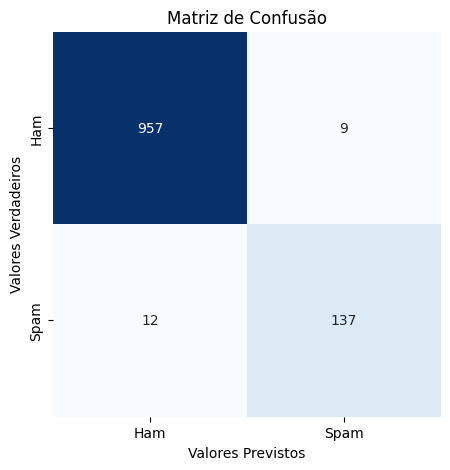

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = classifier.predict(X_test_vectorized)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

In [81]:
from sklearn.metrics import classification_report

# Gerar o relatório de classificação
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])

# Imprimir o relatório de classificação
print('Relatório de Classificação:\n', report)

Relatório de Classificação:
               precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.94      0.92      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

